# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Загрузили файл с данными и изучили общую информацию:

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посмотрели на распределение значений по каждому признаку, построили гистограммы:

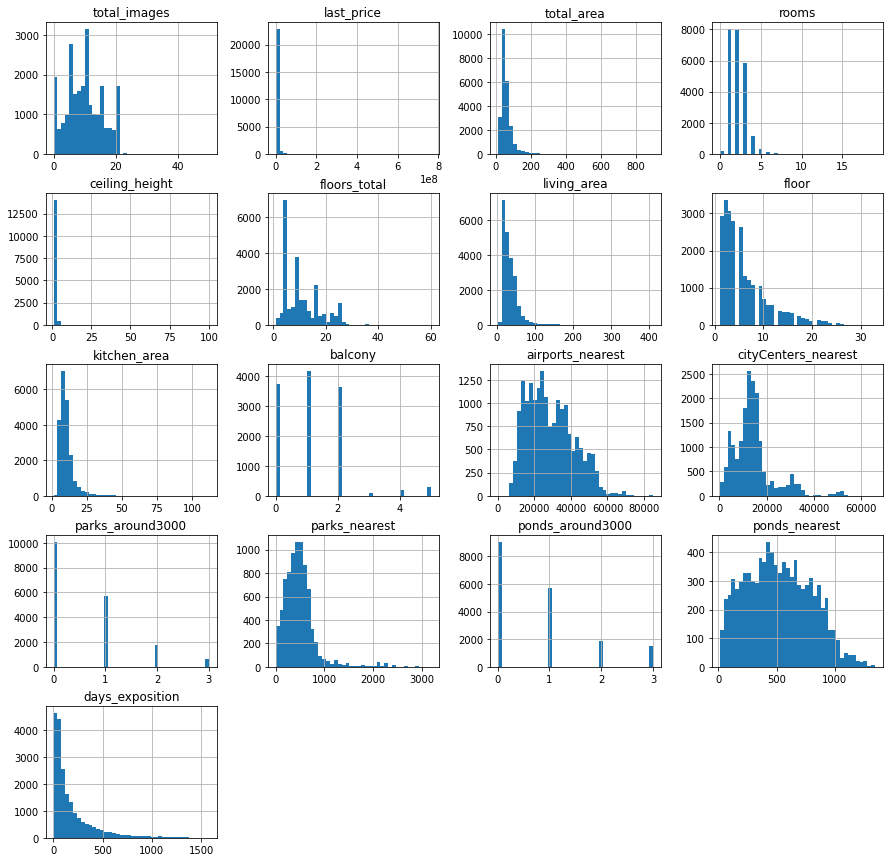

In [ ]:
data.hist(bins=40,figsize=(15,15))
plt.show()

**Выводы после ознакомления с данными:**

- В данных имеются пропуски в нескольких столбцах, которые по возможности предстоит заполнить;
- Некоторые столбцы имеют неподходящий тип данных, что предстоит исправить;
- По статистическим данным можно увидеть в некоторых столбцах сильный разброс значений, необходимо проверить эти столбцы на наличие выбросов;
- На нескольких гистограммах различимы выдающиеся пики, предстоит выяснить их природу.

## Предобработка данных

Вывели стобцы с пропусками и подсчитали количество пропусков:


In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        print(column,'\n',data[column].isna().sum())

ceiling_height 
 9195
floors_total 
 86
living_area 
 1903
is_apartment 
 20924
kitchen_area 
 2278
balcony 
 11519
locality_name 
 49
airports_nearest 
 5542
cityCenters_nearest 
 5519
parks_around3000 
 5518
parks_nearest 
 15620
ponds_around3000 
 5518
ponds_nearest 
 14589
days_exposition 
 3181


Визуализировали количество пропусков в столбцах


<AxesSubplot:>

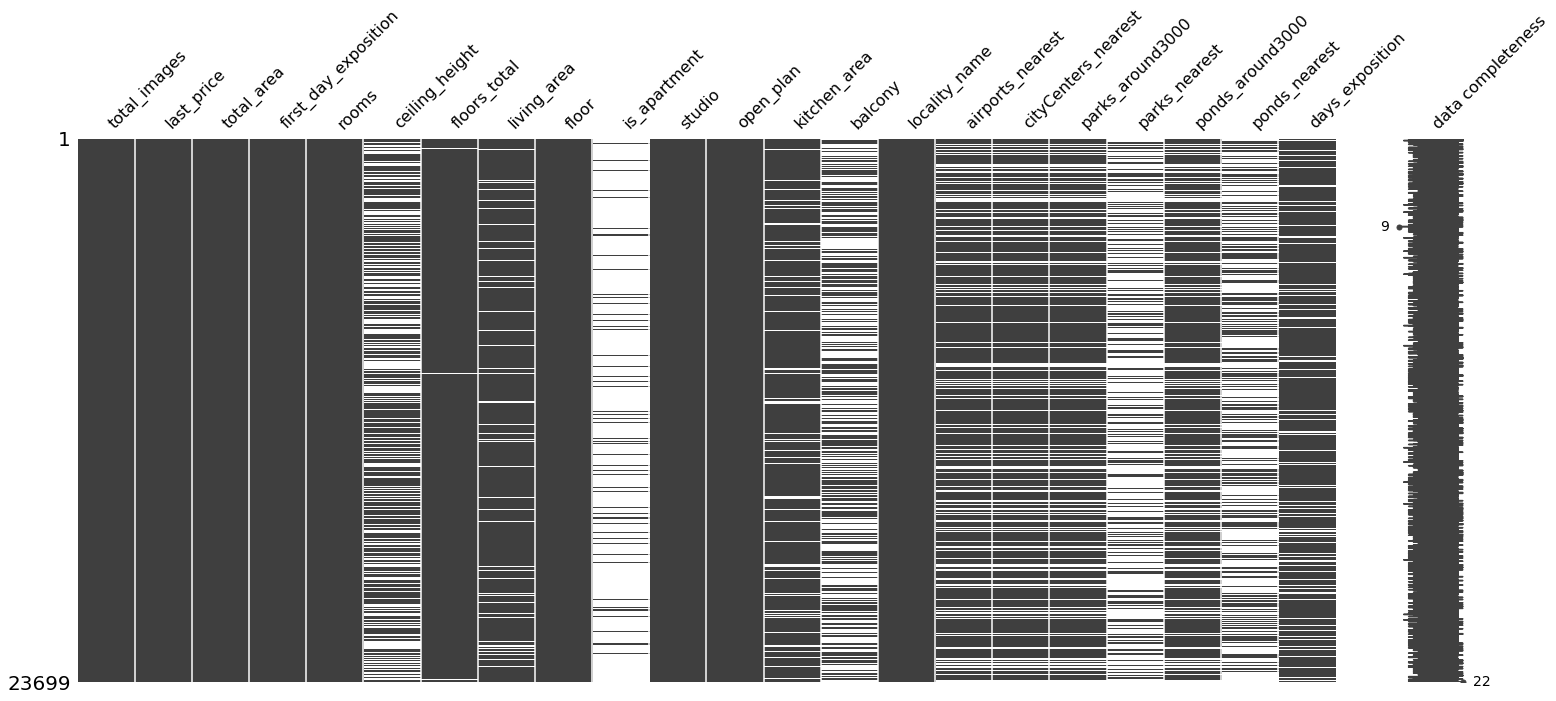

In [ ]:
msno.matrix(data, labels=True)

#### Столбцы, в которых нельзя логически заполнить пропуски:

`floors_total` - если не указано сколько этажей в здании, то заполнить пропуски средним значением или медианой нельзя, потому что эти значения могут оказаться ложными и сильно отличаться от действительных;

`locality_name` - название населённого пункта невозможно заполнить;

`airports_nearest` - расстояние до ближайшего аэропорта невозможно вычислить, не зная координат местоположения, может быть, что в населённом пункте нет аэропорта, поэтому заполнять пропуски в этом столбце не стоит;

`cityCenters_nearest`- нельзя заполнять, так как неизвестно есть ли центр у населённого пункта.
(*была мысль заполнить медианой для каждого конкретного населённого пункта, но возникли сложности с реализацией*)
***

#### Столбцы с пропусками, подлежащими заполнению (без расчета):

`kitchen_area` - если площадь кухни не указана, то, вероятно, кухня не предусмотрена в планировке и можно заполнить пропуски этого столбца ***нулями***;

`balcony` - если не указано количество балконов, то, вероятно, балконов в квартире нет, значит заполняем пропуски ***нулями***;

`parks_around3000`, `ponds_around3000` - если не указано количество водоёмов и парков в пределах 3км, вероятно они отсутствуют вообще, значит можно заполнить пропуски ***нулями***.

`ponds_nearest`, `parks_nearest` - ситуация, аналогичная количеству водоёмов и парков в пределах 3км.

`is_apartment` - если не указано, является ли квартира апартаментами или нет, то скорее всего она ими не является и можно заполнить пропуски соответствующими значениями (***False***);

`days_exposition` - количество дней может быть не указано из-за того, что объявление сняли в день его создания, тогда пропуски в этом столбце можно заполнить ***нулями***.

***
#### Столбцы с пропусками, подлежащими заполнению (с расчетом):

`living_area` - если жилая площадь не указана, то вероятно она соответствует общей площади, значит копируем ***значение из столбца с общей площадью***;

`ceiling_height` - можно заполнить ***средним значением***, так как сильно выбивающихся значений в этом столбце быть не должно.


Заполнили пропуски в столбцах и проверили:

In [ ]:
colunm_to_zero = ['kitchen_area', 'balcony', 'parks_around3000', 'ponds_around3000','ponds_nearest', 'parks_nearest', 'is_apartment', 'days_exposition']
for column in colunm_to_zero:
    data[column] = data[column].fillna(value='0.0')
    print(f'Количество пропусков в столбце {column} =', data[column].isna().sum())

data['is_apartment'] = data['is_apartment'].fillna(False)
print(f'Количество пропусков в столбце is_apartment =', data['is_apartment'].isna().sum())

data.loc[(data['living_area'].isna()), 'living_area'] = data.loc[(data['living_area'].isna()), 'total_area']
print(f'Количество пропусков в столбце living_area =', data['living_area'].isna().sum())

data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()
print(f'Количество пропусков в столбце ceiling_height =', data['ceiling_height'].isna().sum())


Количество пропусков в столбце kitchen_area = 0
Количество пропусков в столбце balcony = 0
Количество пропусков в столбце parks_around3000 = 0
Количество пропусков в столбце ponds_around3000 = 0
Количество пропусков в столбце ponds_nearest = 0
Количество пропусков в столбце parks_nearest = 0
Количество пропусков в столбце is_apartment = 0
Количество пропусков в столбце days_exposition = 0
Количество пропусков в столбце is_apartment = 0
Количество пропусков в столбце living_area = 0
Количество пропусков в столбце ceiling_height = 0


#### Возможные причины появления пропусков:

1. Человеческий фактор:

    - человек, размещающий объявление, мог не указать площадь кухни или количество балконов, так как в квартире не предусмотрена отдельная кухня или нет балкона, то же самое касается остальных параметров;
    - человек, размещающий объявление, мог забыть заполнить один или несколько столбцов, чем объяснятся пропуски, например, в таком параметре как высота потолков;
    - человек, размещающий объявление, мог не знать, как заполнить какой-либо параметр, например является ли квартира апартаментами или есть ли парковки рядом.
    
    
2. Технические причины:
    
    - информация могла потеряться при выгрузке данных;
    
    - пропуски могли появиться при совмещении данных в общую таблицу;
    
    - возможно, количество объектов в округе (количество парковок, парков) определялось на основе геоданных, и в таком случае могли быть перебои с работой этих геоданных, что привело к появлению пропусков.

### Типы данных


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  object 
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Столбцы с несоответствующими типами данных:

`days_exposition`, `balcony`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` - имеют тип *float64* или *object*, хотя для всех этих показателей следует использовать тип *int*, так как они измеряются в целых числах

`is_apartment` - *object*, хотя для этого параметра гораздо больше подходить тип *bool*, потому что он принимает лишь 2 значения (Да/Нет)

`kitchen_area` - *object*, хотя для расчёта площади лучше использовать тип *float*, так как это числовой параметр, который может иметь дробную часть

`first_day_exposition` - *object*, но для даты лучше подходит тип *datetime*

In [ ]:
to_int_list = ['days_exposition','balcony','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']
for col in to_int_list:
    data[col] = pd.to_numeric(data[col])
    data[col] = data[col].astype('int32')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['kitchen_area'] = data['kitchen_area'].astype('float32')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

to_comp_int_list = ['total_images', 'rooms','floor']
for col in to_comp_int_list:
    data[col] = pd.to_numeric(data[col])
    data[col] = data[col].astype('int32')

to_comp_float_list = ['last_price','total_area','ceiling_height','floors_total',
                      'living_area','airports_nearest','cityCenters_nearest']
for col in to_comp_float_list:
    data[col] = pd.to_numeric(data[col])
    data[col] = data[col].astype('float32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int32         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int32         
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

### Неявные дубликаты

Все неявные дубликаты имеют природу разных букв или слов в категории населённого пункта,
поэтому мы переписали столбец с названиями населённых пунктов, выкинув из названия категории.

Для этого написали функцию, переписывающую строку:

In [ ]:
def upper_word(a):
    if type(a) == str:
        return_str = ''
        for i in a:
            if i.isupper():
                index = a.index(i)
                return a[index:]

Применили функцию к столбцу с названиями и проверили:


In [ ]:
data['locality_name'] = data['locality_name'].apply(upper_word)

sorted_names = data['locality_name'].sort_values()
for name in sorted_names.unique():
    print(name)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпосёлок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичёво
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
К

### Выбивающиеся значения в данных

Прошли по всем столбцам и посмотрели на первые и последние 10 значений, у столбца `ceiling_height` посмотрели все значения:


In [ ]:
for col in data.columns:
    if col not in ['is_apartment', 'studio', 'open_plan', 'locality_name', 'balcony',
                  'parks_around3000', 'ponds_around3000', 'publication_weekday', 'publication_month',
                  'publication_year', 'floor_type']:
        counts = data[col].unique()
        print('\n', col)
        for i in range(1,11):
            print(sorted(counts)[i],'\t', sorted(counts)[-11+i])


 total_images
1 	 28
2 	 29
3 	 30
4 	 31
5 	 32
6 	 35
7 	 37
8 	 39
9 	 42
10 	 50

 last_price
430000.0 	 190870000.0
440000.0 	 230000000.0
450000.0 	 240000000.0
470000.0 	 245000000.0
480000.0 	 289238400.0
490000.0 	 300000000.0
500000.0 	 330000000.0
520000.0 	 401300000.0
530000.0 	 420000000.0
550000.0 	 763000000.0

 total_area
13.0 	 494.1
13.2 	 495.0
14.0 	 500.0
15.0 	 507.0
15.5 	 517.0
16.0 	 590.0
17.0 	 618.0
17.2 	 631.0
17.6 	 631.2
17.78 	 900.0

 first_day_exposition
2014-11-29T00:00:00.000000000 	 2019-04-24T00:00:00.000000000
2014-12-04T00:00:00.000000000 	 2019-04-25T00:00:00.000000000
2014-12-05T00:00:00.000000000 	 2019-04-26T00:00:00.000000000
2014-12-08T00:00:00.000000000 	 2019-04-27T00:00:00.000000000
2014-12-09T00:00:00.000000000 	 2019-04-28T00:00:00.000000000
2014-12-10T00:00:00.000000000 	 2019-04-29T00:00:00.000000000
2014-12-11T00:00:00.000000000 	 2019-04-30T00:00:00.000000000
2014-12-12T00:00:00.000000000 	 2019-05-01T00:00:00.000000000
2014-12-

**Выбивающиеся значения в столбцах:**

`last_price` - 12190.0 - нереальная цена для недвижимости

`total_area` - 900.0 - общая площадь, первосходящая предыдущее максимальное значение почти в 1.5 раза

`ceiling_height` - 1.0, 1.2; 10.3, 14.0, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0 - нереальные высоты потолков

(*8.0, 8.3 - такие высоты были взяты за возможные, на основе статьи https://dzen.ru/a/XThFU85EoACso8MF*)

В столбцах `last_price` и `total_area`выбивающиеся значения лучше удалить, так как неизвестна природа их появления и они носят разовый характер

А в столбце `ceiling_height`, вероятно, произошла ошибка при вводе данных и разделительная точка была поставлена на 1 знак правее, из-за чего высота потолков стала измерсяться в десятках метров, поэтому нереальные значения стоит уменьшить в 10 раз.
Значения *1.0* и *1.2* стоит удалить по логике описанной выше для двух других столбцов.


Отфильтровали выбивающиеся значения и исправили неправдоподобные, проверили:


In [ ]:
data = data.loc[data['last_price'] >= 300000.0]
data = data.loc[data['total_area'] <= 700.0]
data = data.loc[data['ceiling_height'] >= 1.5]

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height']*0.1
data = data.loc[data['ceiling_height'] >= 1.5]
data = data.loc[data['ceiling_height'] < 10]

print(sorted(data['ceiling_height'].unique()))

[1.75, 2.0, 2.2, 2.25, 2.26, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.6000001, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3]

**При проверке высот потолков видно наличие неудобных значений с множеством знаков после запятой**

Такие же неудобные значения могут быть и в других столбцах с числовыми дробными параметрами, стоит от них избавиться:

In [ ]:
for col in ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest']:
    data[col] = data[col].round(2)

#### Выводы:

1. Нашли все столбцы с пропусками.

2. Определили и заполнили стобцы, подлежащие заполнению.

3. Привели возможные причины появления пропусков.

4. Привели данные в столбцах к более подходящим типам данных.

5. Нашли и избавились от неявных дубликатов.

6. Отфильтровали выбивающиеся значения.

7. Округлили численные значения, чтобы избавиться от значений с множеством знаков после запятой.

### Новые столбцы

**Новые столбцы:**

Цена одного квадратного метра: `price_of_m2` = `last_price`/`total_area`

День недели в день публикации объявления: `publication_weekday`

Месяц публикации объявления: `publication_month`

Год публикации объявления: `publication_year`

Тип этажа квартиры (значения — «первый», «последний», «другой»): `floor_type`

Расстояние в км до центра города: `cityCenters_nearest_km`

In [ ]:
data['price_of_m2'] = (data['last_price']/data['total_area']).round(2)
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

for i, row in data.iterrows():
    if data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_type'] = 'первый'
    elif data.loc[i, 'floors_total']:
        if data.loc[i,'floor'] == data.loc[i,'floors_total']:
            data.loc[i, 'floor_type'] = 'последний'
        else:
            data.loc[i, 'floor_type'] = 'другой'
            data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(2)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,publication_weekday,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,True,...,482,2,755,0,120370.367188,3,3,2019,другой,16.030001
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,True,...,0,0,0,81,82920.789062,1,12,2018,первый,18.600000
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,True,...,90,2,574,558,92785.710938,3,8,2015,другой,13.930000
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,159.000000,9,True,...,84,3,234,424,408176.093750,4,7,2015,другой,6.800000
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112,1,48,121,100000.000000,1,6,2018,другой,8.100000
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12.0,14.400000,5,True,...,0,0,0,55,95065.789062,0,9,2018,другой,NaN
6,6,3700000.0,37.299999,2017-11-02,1,2.65,26.0,10.600000,6,True,...,0,0,0,155,99195.710938,3,11,2017,другой,19.139999
7,5,7915000.5,71.599998,2019-04-18,2,2.65,24.0,71.599998,22,True,...,0,0,0,0,110544.703125,3,4,2019,другой,11.630000
8,20,2900000.0,33.160000,2018-05-23,1,2.65,27.0,15.430000,26,True,...,0,0,0,189,87454.773438,2,5,2018,другой,NaN
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,True,...,0,0,0,289,88524.593750,6,2,2017,другой,15.010000


#### Выводы:

Добавили новые столбцы (цена м2, день недели, месяц и год публикации, тип этажа, расстояние  до центра города в км) в датафрейм и рассчитали для них значения по имеющимся данным.

### Исследовательский анализ данных

#### Изучение параметров

Создали список интересующих нас параметров и построили по этому списку гистограммы:


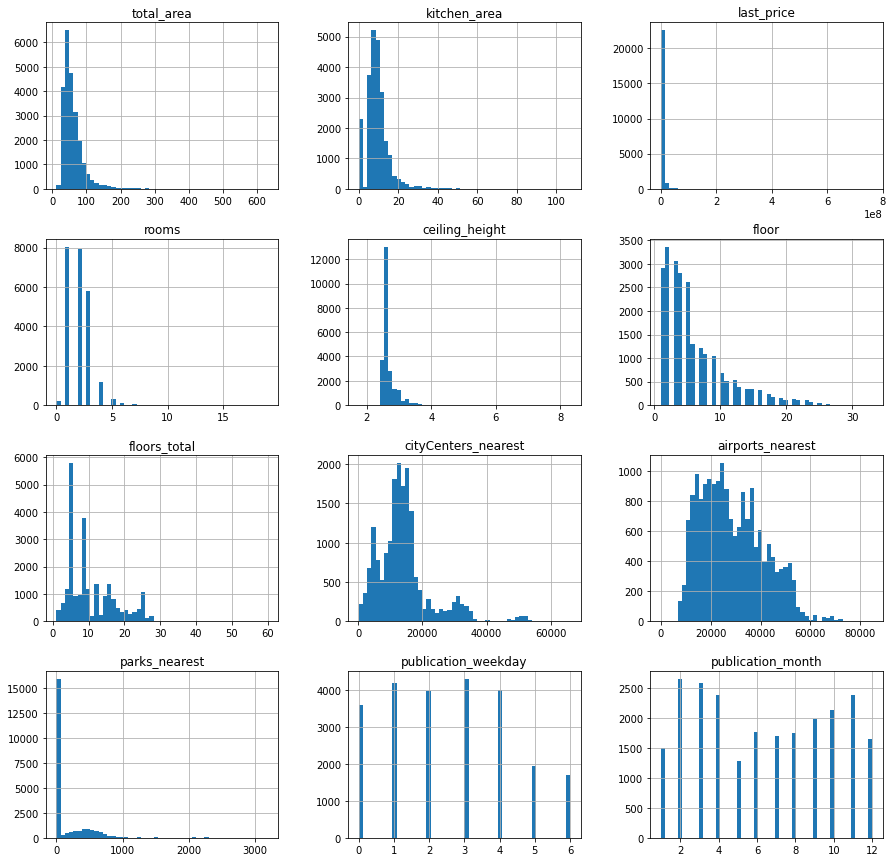

In [ ]:
par_list = ['total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',
            'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest',
            'publication_weekday', 'publication_month']
data[par_list].hist(bins=50, figsize=(15,15))
plt.show()

Отдельно построили гисторгамму для параметра тип этажа, т.к. для него максимально возможное количество корзин - 3


<AxesSubplot:>

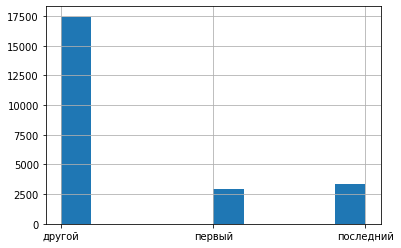

In [ ]:
data['floor_type'].hist()

Построили ещё раз гистограмму общей стоимости с ограниченным диапазоном значений, для большей наглядности


<AxesSubplot:>

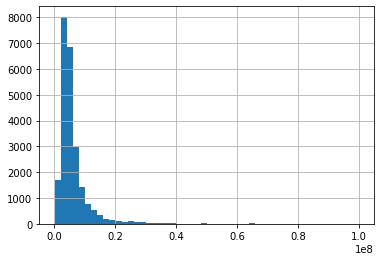

In [ ]:
data['last_price'].hist(bins=50, range=(200000, 100000000))

Вывели статистические данные для интересующих нас параметров:


In [ ]:
data[par_list].describe()

,total_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,publication_weekday,publication_month
count,23692.000000,23692.000000,23692.0,23692.000000,23692.000000,23692.000000,23606.000000,18174.000000,18151.000000,23692.000000,23692.000000,23692.000000
mean,60.314430,9.548711,6524343.5,2.070319,2.697743,5.890596,10.672795,14192.380859,28792.927734,167.290604,2.569348,6.399713
std,35.237080,6.383797,10551779.0,1.076588,0.232024,4.882341,6.596356,8609.469727,12632.160156,306.715130,1.789159,3.491668
min,12.000000,0.000000,430000.0,0.000000,1.750000,1.000000,1.000000,181.000000,0.000000,0.000000,0.000000,1.000000
25%,40.000000,6.300000,3400000.0,1.000000,2.600000,2.000000,5.000000,9238.000000,18583.500000,0.000000,1.000000,3.000000
50%,52.000000,9.000000,4650000.0,2.000000,2.650000,4.000000,9.000000,13100.000000,26726.000000,0.000000,3.000000,6.000000
75%,69.900002,11.440000,6800000.0,3.000000,2.700000,8.000000,16.000000,16293.000000,37276.000000,301.000000,4.000000,10.000000
max,631.200012,107.000000,763000000.0,19.000000,8.300000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


*Общая площадь* квартир в основном колеблется в диапазоне 40-70 м2 (1-3 квартили);

*Жилая площадь* имеет чуть меньший разброс: 19-44 м2 (1-3 квартили);

*Площадь кухни* имеет в среднем 9 м2, причём медиана очень близко - 9,5. Также немало объявлений не имели информации о площади кухни, что отразилось на гистограмме в виде пика значений в нуле;

*Цена объекта* плохо просматриваема без постановки диапазона гистограммы - поставили диапазон до 100 млн. и картинка стала наглядной; 75% цен ниже 6.8 млн.;

*Количество комнат* - на гистограмме ярко выражены 3 пика у 1, 2 и 3-х комнатных квартир, причем 1 и 2-х комнатных почти одинаковое количество, 3-х комнатных чуть меньше;

*Высота потолков* имеет ярко выраженный пик в районе высоты 2,5-3 метров;

*Этаж квартиры* - гистограмма по этому параметру имеет длинный правый хвост, а большая часть значений расположена в диапазоне 1-5 этажей, что связано, с тем, что в основном в выбранных городах дома 5-тиэтажные и ниже (что характерно для советской застройки, которая преобладает в России);

*Тип этажа квартиры («первый», «последний», «другой»)* ожидаемо имел пик в значении "другой", а в значениях "первый" и "последний" количество примерно одинаковое;

*Общее количество этажей в доме* подтверждает картину советской застройки: выдающийся пик в значении 5 этажей и второй по силе, но не менее выдающийся пик в значении 9 этажей;

*Расстояние до центра города в метрах* имеет два пика в районе 5 и 15 тыс. метров, что, возможно, обусловлено разными размерами населённых пунктов, т.е. первый пик описывает ситуацию для малых населённых пунктов, а второй пик для крупных;

*Расстояние до ближайшего аэропорта* не имеет каких-либо ярко выраженных пиков, и в целом похоже на нормальное распределение, чего и стоило ожидать;

*Расстояние до ближайшего парка* если не брать во внимание пик в значении 0, который был создан при заполнении пропусков, можно сказать, что в данных нет выбросов и распределение данных носит нормальный характер;

*День и месяц публикации объявления*: дни публикации объявлений имеют заметный сдвиг в сторону будних дней, причем с понедельника по пятницу значения почти не разняться; месяцы публикаций также распределены неравномерно, можно заметить, что частота публикаций к середине зимы наростает, а затем постепенно падает, за искючением декабря-января (подготовка к новому году и посленовогодние праздники дают о себе знать).

***Вывод по изученным параметрам:*** все параметры имеют ожидаемое распределение и не имеют выбросов (за исключением нескольких случаев, в которых есть объяснение этим выбросам)

#### Скорость продажи квартир

Построили гистограмму и посчитали среднее и медиану по выбранному пораметру
Для оценки самых медленных и самых быстрых объявлений рассчитали границы %5 объявлений  в начале и конце распределения (в начале распределения идут объявления которые были сняты в день публикации, они были пропущены):

Средний срок продажи квартиры составляет 156.62 дней,
Медиана по срокам продажи составляет 74.0 дней
13.43% объявлений были сняты в день публикации
5% самых быстрых объявлений были размещены 9.0 дней и меньше
5% самых долгих объявлений были размещены 603.0 дней и больше


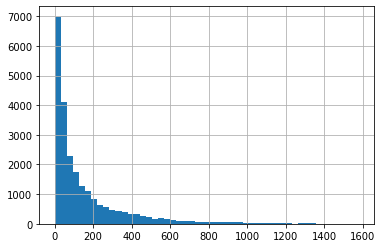

In [ ]:
data['days_exposition'].hist(bins=50)
print(f"Средний срок продажи квартиры составляет {data['days_exposition'].mean().round(2)} дней,\n\
Медиана по срокам продажи составляет {data['days_exposition'].median()} дней")

q_95 = data['days_exposition'].quantile(0.95)
zero_days_part = ((data['days_exposition'] == 0).sum()/len(data['days_exposition'])*100).round(2)
q_5 = data['days_exposition'].quantile(0.18)
print(f'{zero_days_part}% объявлений были сняты в день публикации\n\
5% самых быстрых объявлений были размещены {q_5} дней и меньше\n\
5% самых долгих объявлений были размещены {q_95} дней и больше')

При приближении графика можно найти пики в значениях 45 и 60 дней:


<AxesSubplot:>

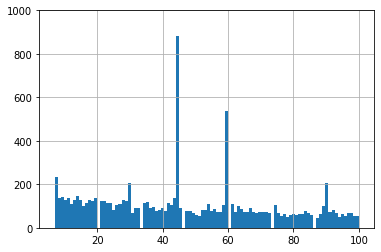

In [ ]:
plt.ylim([0, 1000])
data['days_exposition'].hist(bins=100, range=(7, 100))

Для оценки времени продажи в обычном случае взяли в расчет медиану, т.к. сроки сильно разняться - от нескольких дней до нескольких лет.

**Обычно временя продажи** составляет 74 дня, то есть обычно квартиры находили навых хозяев за 2,5 месяца.

**Быстрой продажей** можно считать продажу за чуть более чем неделю (менее 9 дней)

**Необыкновенно медленные продажи** тянуться более полутора лет (более 603 дней)

Пики в значениях, найденные при приближении, возможно, связаны с механизмами работы платформы. Например, объявления могут не иметь свойства продления и в таком случае они удаляются через 45 или 60 дней (по умолчанию) или можно поставить срок жизни объявления в 7, 30 или 90 дней (слабо выдающиеся пики в этих значениях).

#### Влияние различных параметров на общую стоимость квартиры

Создали сводную таблицу по интересующим нас параметрам.
Данные из столбца `first_day_exposition` невозможно включить в таблицу из-за их типа `datetime`.
Но есть аналог этого столбца - `days_exposition`, включили его вместо `first_day_exposition`:


In [ ]:
general_pivot = data.pivot_table(index='price_of_m2', values=['last_price','total_area','days_exposition',
                                 'rooms','floor','living_area','kitchen_area'])
parameters_list = ['total_area','rooms','floor','living_area','kitchen_area','days_exposition']

general_pivot

,days_exposition,floor,kitchen_area,last_price,living_area,rooms,total_area
price_of_m2,,,,,,,
7.962960e+03,44.0,3.0,0.000000,430000.0,54.000000,2.0,54.000000
9.615380e+03,110.0,1.0,8.000000,500000.0,31.000000,2.0,52.000000
1.018519e+04,78.0,1.0,7.500000,550000.0,40.000000,2.0,54.000000
1.036866e+04,96.0,3.0,5.500000,450000.0,30.299999,2.0,43.400002
1.050725e+04,52.0,2.0,12.000000,1450000.0,58.000000,3.0,138.000000
...,...,...,...,...,...,...,...
9.959839e+05,45.0,2.0,20.000000,124000000.0,67.199997,4.0,124.500000
1.000748e+06,393.0,9.0,24.000000,401300000.0,204.000000,5.0,401.000000
1.542605e+06,0.0,6.0,30.200001,289238400.0,63.700001,2.0,187.500000


Написали функцию для отрисовки графиков (для наглядности поставили диапозан цены до 50 млн. и отрезали сильно выдающиеся значения параметров).
Отрисовали графики зависимости для каждого из параметров:

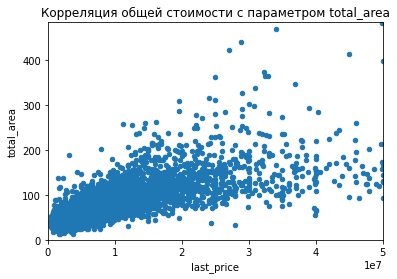

In [ ]:

def price_from(par):
    general_pivot.plot(x='last_price', y=par, kind='scatter',
                   xlim=(0,50000000), ylim=(0, data[par].quantile(0.9995)),
                       title=f'Корреляция общей стоимости с параметром {par}')

price_from('total_area')

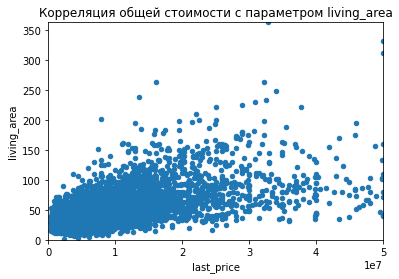

In [ ]:
price_from('living_area')

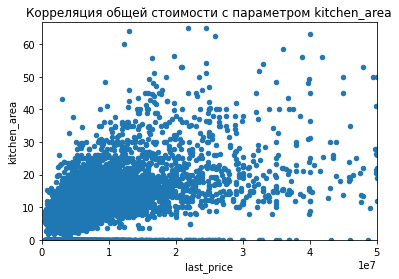

In [ ]:
price_from('kitchen_area')

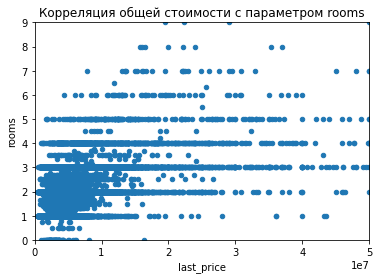

In [ ]:
price_from('rooms')

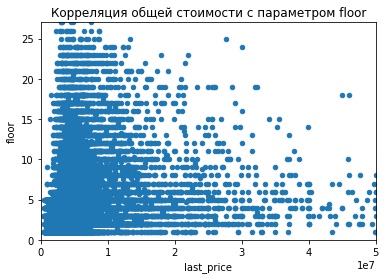

In [ ]:
price_from('floor')

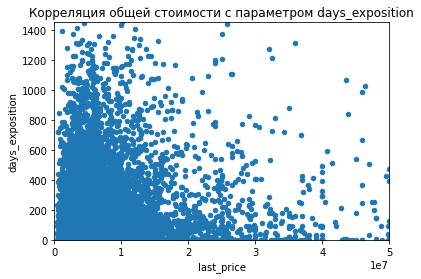

In [ ]:
price_from('days_exposition')

In [ ]:
for par in parameters_list:
    print(f'Коэффициент корреляции цены с параметром {par} составляет:\
          \n{general_pivot["last_price"].corr(general_pivot[par]).round(2)}\n')

Коэффициент корреляции цены с параметром total_area составляет:          
0.64

Коэффициент корреляции цены с параметром rooms составляет:          
0.35

Коэффициент корреляции цены с параметром floor составляет:          
0.02

Коэффициент корреляции цены с параметром living_area составляет:          
0.55

Коэффициент корреляции цены с параметром kitchen_area составляет:          
0.38

Коэффициент корреляции цены с параметром days_exposition составляет:          
0.06



**Корреляция общей стоимости жилья:**

- с днем размещения объвления и с этажом отсутсвует;
- с количеством комнат и с площадью кухни небольшая;
- с жилой площадью и с общей площадью больше всего.

#### Средняя цена м2

Для расчета средней цены за квадратный метр в городах сделали сводную таблицу:


In [ ]:
pivot_count_price_of_m2 = data.pivot_table(index='locality_name', values=['price_of_m2'], aggfunc=['count','median'])
pivot_count_price_of_m2.columns = ['count', 'median_price_of_m2']

print('Средняя цена за м2 в 10 населённых пунктов с наибольшим количеством объявлений:',
      '\n',pivot_count_price_of_m2.sort_values(by='count', ascending=False).head(10),'\n')
print('Населённые пункты с самыми высокими и самыми низкими средними ценами за м2:',
      '\n',pivot_count_price_of_m2.sort_values(by='median_price_of_m2', ascending=False),'\n')

Средняя цена за м2 в 10 населённых пунктов с наибольшим количеством объявлений: 
                  count  median_price_of_m2
locality_name                             
Санкт-Петербург  15715       104761.906250
Мурино             590        86175.640625
Кудрово            472        95675.468750
Шушары             440        76876.171875
Всеволожск         398        65789.476562
Пушкин             369       100000.000000
Колпино            338        74723.750000
Парголово          327        91642.859375
Гатчина            307        67796.609375
Выборг             237        58158.320312 

Населённые пункты с самыми высокими и самыми низкими средними ценами за м2: 
                  count  median_price_of_m2
locality_name                             
Санкт-Петербург  15715       104761.906250
Зеленогорск         24       101666.671875
Пушкин             369       100000.000000
Сестрорецк         183        99678.453125
Левашово             1        96997.703125
...                ..

#### Средняя цена каждого км в Санкт-Петербурге

Для расчета цены за каждый километр в Санкт-Петербурге нужно разбить даные по диапазонам и посчитать среднюю стоимость за м2 в каждой группе. Узнали как далеко самое отдалённое от центра объявление (не деальше 30км). Посчитали среднюю цену за м2 на каждом км. Построили график отношения цены за м2 от удалённости от центра в км:

[ 0.18  0.21  0.22 ... 29.34 29.49   nan]


<AxesSubplot:>

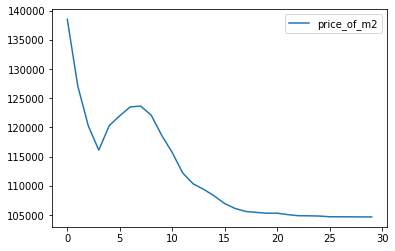

In [ ]:
print(data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km'].sort_values().unique())

StPb_km_list = []
for km in range(1,31):
    km_price = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= @km')['price_of_m2'].median()
    StPb_km_list.append(km_price)

km_df = pd.DataFrame({'price_of_m2': StPb_km_list})
km_df.plot()

На графике отношения цены от км видна линейная зависимоть: чем дальше от центра, тем меньше цена жил.площади.

За чертой в 15 км от центра города цены мало меняются.

Падение цен замедляется в районе 2,5 км от центра, можно предположить, что географически центр города имеет радиус как раз 2,5 км и за этой чертой цена начинает падать плавнее.
Отклонения от графика могут быть из-за элитных застроек, расположенных на удалении от центра, которые стоят дороже менее качественного жилья, расположенного ближе к центру.

Предположили, что второй пик имеет природу Крестовского острова, на котором очень "горячие" цены, согласно тепловым картам (спасибо https://yandex.ru/blog/company/teplovye-karty-tsen-na-zhile).

### Общий вывод

На этапе предобработки мы заполнили пропуски, удалили дубликаты, привели данные к подходящему типу и отфильтровали от выбивающихся значений.

Возможными причинами появления пропусков в данных считаем либо человеческий фактор (например, пропуск одного из пунктов при заполнении информации о квартире), либо технические ошибки (например, потеря данных при выгрузке из источника)

Для более глубокого анализа данных рассчитали и добавли новые параметры по уже имеющимся данным: цена м2, день недели, месяц и год публикации, тип этажа, расстояние  до центра города в км.

В ходе анализа данных:
    
1. Изучили и описали основные параметры (объяснили природу пиковых значений, аномалий не обнаружили, зафиксировали соответствие распределения ожидаемому).

2. Детально изучили скорость продажи квартир и установили, что в среднем квартиры продаются за 74 дня, а быстрыми и аномально медленными продажами можно считать сделки совершенные в течение 9 дней и более чем за 603 дней после публикации объявления соответственно. Также имеются пики в некоторых значениях, видимо, основанных на заданных значениях жизни объявлений или отсутствии автообновлений публикаций, в результате чего они снимаются через точно установленное количество дней.

3. Изучили влияние различных параметров на общую стоимость жилья и установили, что она коррелирует больше всего с такими показателями как общая площадь и жилая площадь, слабо коррелирует с показателями количества комнат и площади кухни и не коррелирует с датой размещения объявления и этажом квартиры.

4. Определили среднюю цену жилья за м2 в топ-10 населенных пунктах по количеству объявлений (топ-3: Санкт-Петербург, Мурино, Кудрово), а также населённые пункты с наиболее дешёвыми (Вахнова Кара, Свирь, Старополье) и наиболее дорогими (Санкт-Петербург, Зеленогорск, Пушкино) ценами на жилье за м2.

5. Посчитали среднюю цену жилья в Санкт-Петербурге для каждого километра и привели график, отражающий зависимость стоимости жилья за м2 от удалённости жилья от центра города - зависимость линейная, чем дальше от центра города, тем дешевле стоимость жилья; также присутствует исключение из зависимости в диапазоне около 2,5км от центра, природа которого требует детального изучения.
    